In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.color import hsv2rgb, rgb2hsv
import chart_studio.plotly as py
import plotly.graph_objs as go

current_mood = pd.read_csv('current_mood.csv', index_col=0)

current_mood.head()

,UserID,CurrentMoodV,CurrentMoodA,H,S,V,Active,WideAwake,Drowsy,Inactive,...,Relaxed,Happy,Tired,Cheerful,Joyous,Satistfied,Sleepy,Sad,Calm,Angry
0,1,0.8885,0.8262,0.825000,0.50,1.0,0.8914,0.6071,0.0514,0.0314,...,0.7343,0.9443,0.3400,0.8843,0.6114,0.9300,0.0343,0.1800,0.5086,0.0800
1,13,0.4754,-0.1639,0.366667,1.00,1.0,0.7129,0.6571,0.2786,0.2971,...,0.6129,0.6586,0.1300,0.5686,0.5086,0.5329,0.2786,0.0157,0.9514,0.0214
2,86,0.6393,0.7279,0.641667,1.00,1.0,0.6757,0.7657,0.1486,0.0357,...,0.5643,0.4986,0.3200,0.5571,0.6329,0.4686,0.1357,0.3914,0.4714,0.5543
3,124,-0.0033,-0.1639,0.641667,0.50,1.0,0.0543,0.1843,0.9429,0.9300,...,0.5971,0.5871,0.7714,0.1400,0.5129,0.7643,0.8671,0.0457,0.8414,0.1029
4,207,0.6525,0.3803,0.641667,0.75,1.0,0.4557,0.8014,0.1314,0.4543,...,0.6700,0.5543,0.2871,0.4943,0.5686,0.5357,0.2314,0.0900,0.8271,0.1086


In [2]:
H, W = 27, 27


# current_mood[['V']][:H*W].to_numpy()[:10]
current_mood['V'].value_counts()

1.00    700
0.25     13
0.50     13
0.75      8
0.00      4
Name: V, dtype: int64

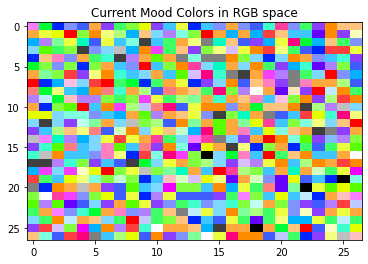

In [3]:
h = current_mood['H'][:H*W].to_numpy(dtype='float32').reshape(H, W)
s = current_mood['S'][:H*W].to_numpy(dtype='float32').reshape(H, W)
v = current_mood['V'][:H*W].to_numpy(dtype='float32').reshape(H, W)
hsv_mat = np.dstack((h, s, v))


mat = hsv2rgb(hsv_mat)
mat = (mat * 255).astype('uint8')

plt.imshow(mat, aspect='auto')
plt.title('Current Mood Colors in RGB space');

[0.82421875 0.50196078 1.        ]


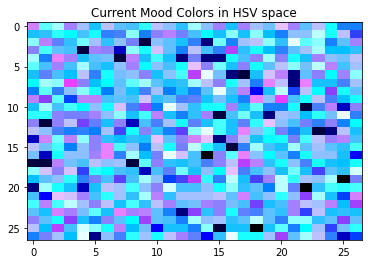

In [4]:
rgb = mat

hsv_alt = rgb2hsv(rgb)
print(hsv_alt[0, 0])
plt.imshow(hsv_alt, aspect='auto', cmap=plt.get_cmap('hsv'))
plt.title('Current Mood Colors in HSV space');

In [17]:
hh = current_mood['H'].to_numpy(dtype='float32')
ss = current_mood['S'].to_numpy(dtype='float32')
vv = current_mood['V'].to_numpy(dtype='float32')

colors = np.array([hsv2rgb((h, s, v)) for h, s, v in zip(hh, ss, vv)])
colors = (colors * 255).astype('uint8')
rgb_string = []
for color in colors:
    r, g, b = color
    rgb_string.append(f'rgb({r},{g},{b})')
    
layout = dict(
            plot_bgcolor='white',
            xaxis=dict(title='Valence',
                         linecolor='#d9d9d9',
                         showgrid=False,
                         mirror=True),
            yaxis=dict(title='Arousal',
                         linecolor='#d9d9d9',
                         showgrid=False,
                         mirror=True),
            title='Current Mood Color Spectrum in VA-space (RGB)')

fig = go.Figure(layout=layout)

fig.add_trace(
    go.Scatter(
        x=current_mood.CurrentMoodV,
        y=current_mood.CurrentMoodA,
        mode='markers',
        textposition='top center',
        marker=dict(color=rgb_string),
    )
)

In [44]:
hh_ = (hh * 360)
ss_ = (ss * 100)
vv_ = (vv * 100)

colors_hsv = np.array([(h, s, v) for h, s, v in zip(hh_, ss_, vv_)])

hsv_string = []
for color in colors_hsv:
    h, s, v = color
    hsv_string.append(f'hsv({h},{s}%,{v}%)')
    
layout = dict(
            plot_bgcolor='white',
            xaxis=dict(title='Valence',
                         linecolor='#d9d9d9',
                         showgrid=False,
                         mirror=True),
            yaxis=dict(title='Arousal',
                         linecolor='#d9d9d9',
                         showgrid=False,
                         mirror=True),
            title='Current Mood Color Spectrum in VA-space (HSV)')

fig = go.Figure(layout=layout)

fig.add_trace(
    go.Scatter(
        x=current_mood.CurrentMoodV,
        y=current_mood.CurrentMoodA,
        mode='markers',
        textposition='top center',
        marker=dict(color=hsv_string),
    )
)